In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pycaret.classification import *

In [31]:
data = pd.read_csv('processed2.csv')


In [32]:
data.drop(columns=['location','file_id'], axis=1 , inplace=True)

In [33]:
data["class"].replace({"baseline": "0", "seizure": "1"}, inplace=True)


In [34]:
data['HR'] = data['HR'].str.replace(r'\D', '')

In [35]:
data['Age'] = data['Age'].str.replace(r'\D', '')

In [36]:
data['HR'] = pd.to_numeric(data['HR'], downcast='signed')

In [37]:
data['Age'] = pd.to_numeric(data['Age'], downcast='signed')

In [40]:
data['HR'].fillna(value=data['HR'].median(), inplace=True)

In [41]:
data['Age'].fillna(value=data['Age'].median(), inplace=True)

In [43]:
data.head()

,class,CZ|2_4Hz,CZ|4_8Hz,CZ|8_12Hz,CZ|12_30Hz,CZ|30_70Hz,CZ|Ratio_3_12/2_30Hz,CZ|D6_mean,CZ|D5_mean,CZ|D4_mean,CZ|D3_mean,CZ|D2_mean,CZ|D1_mean,CZ|D6_std,CZ|D5_std,CZ|D4_std,CZ|D3_std,CZ|D2_std,CZ|D1_std,CZ|D6_ratio,CZ|D5_ratio,CZ|D4_ratio,CZ|D3_ratio,CZ|D2_ratio,CZ|D1_ratio,CZ|D6_mean_abs,CZ|D5_mean_abs,CZ|D4_mean_abs,CZ|D3_mean_abs,CZ|D2_mean_abs,CZ|D1_mean_abs,CZ|D6_LSWT,CZ|D5_LSWT,CZ|D4_LSWT,CZ|D3_LSWT,CZ|D2_LSWT,CZ|D1_LSWT,Age,Gender,Impression,HR
0,0,77.429564,28.734279,13.102026,2.467909,0.462172,0.138219,-1.758529,3.689356,0.572214,0.401766,-0.008293,-0.041443,94.954945,77.076934,36.437346,18.901216,6.525675,2.479045,1.272058,1.147393,0.756706,0.877359,0.631333,0.362810,76.722313,60.313528,28.409123,14.772764,5.266416,1.910710,0.000000,6.427250,5.613190,5.805773,4.749819,3.665018,60.0,female,abnormal EEG,80.0
1,0,1060.585071,480.018796,201.886582,29.713494,4.070126,0.140057,-43.528777,5.563645,-5.458138,-1.311734,0.120496,-0.002805,399.209789,281.923087,151.139973,67.289651,18.696915,3.012844,1.878949,0.824373,0.906137,0.687953,0.514802,0.208105,281.597393,149.869616,81.999218,31.116812,8.462824,1.761159,0.000000,8.241056,7.388935,7.770027,8.062119,8.020356,60.0,female,Not specified,84.0
2,0,316.076591,186.372298,135.970946,20.841888,2.781560,0.148809,7.140095,-10.223593,1.088205,-1.555793,-0.034026,-0.034373,357.861759,132.001620,118.527127,55.385295,15.882118,4.972672,2.901753,0.533720,1.222865,0.809146,0.499067,0.210005,298.635855,102.915688,87.018413,39.403208,10.376156,2.179047,7.534104,0.000000,7.412203,6.336933,7.197397,7.170449,60.0,female,abnormal EEG,80.0
3,0,213.966621,91.338657,34.191639,3.157286,0.573759,0.064002,-15.857898,-3.700006,3.257209,-0.135347,0.081712,-0.032627,165.928055,119.045182,59.769483,22.377317,6.419182,2.324330,1.400790,1.052269,0.839701,0.687769,0.516294,0.365782,127.731141,91.185066,45.580184,17.377872,4.953816,1.812019,0.000000,6.422032,7.582963,6.947882,7.086014,6.950912,66.0,female,abnormal EEG,84.0
4,0,973.296659,385.347165,218.880920,47.891201,7.560384,0.183348,-21.433089,-34.709688,5.766435,-3.044324,0.069729,0.081691,346.795965,216.454349,152.238202,75.145144,28.542184,6.026236,1.648172,0.853625,1.051711,0.801236,0.625299,0.198041,270.422836,164.074428,113.995056,52.705751,17.566081,3.478807,8.055723,0.000000,8.726303,8.031105,8.460379,8.480473,66.0,female,abnormal EEG,100.0


In [44]:
exp_clf101 = setup(data = data, target = 'class', session_id=123,
                   numeric_imputation="median",
                   categorical_features=["Gender","Impression","HR"],
                   normalize = True,
                  transformation = True,
                  ignore_low_variance = True,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                  silent=True)

,Description,Value
0,session_id,123
1,Target,class
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(500, 41)"
5,Missing Values,False
6,Numeric Features,37
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [45]:
best_model = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9857,0.9858,0.9857,0.9482,0.9646,0.9557,0.9575,0.0060
ada,Ada Boost Classifier,0.9857,0.9984,0.9571,0.9732,0.9613,0.9527,0.9554,0.0480
lightgbm,Light Gradient Boosting Machine,0.9829,0.9974,0.9429,0.9714,0.9549,0.9444,0.9460,0.0340
lda,Linear Discriminant Analysis,0.9828,0.9972,0.9405,0.9714,0.9535,0.9430,0.9448,0.0070
et,Extra Trees Classifier,0.9828,0.9985,0.9405,0.9714,0.9535,0.9430,0.9448,0.0840
ridge,Ridge Classifier,0.9799,0.0000,0.9262,0.9714,0.9459,0.9336,0.9357,0.0060
rf,Random Forest Classifier,0.9799,0.9972,0.9405,0.9589,0.9469,0.9345,0.9366,0.0910
gbc,Gradient Boosting Classifier,0.9799,0.9796,0.9548,0.9482,0.9478,0.9354,0.9382,0.0840
lr,Logistic Regression,0.9742,0.9980,0.9119,0.9548,0.9305,0.9147,0.9168,0.5560
nb,Naive Bayes,0.9714,0.9531,0.9286,0.9339,0.9283,0.9105,0.9127,0.0060


In [46]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9714,1.0000,1.0000,0.8571,0.9231,0.9057,0.9097
1,0.9714,0.9949,0.8571,1.0000,0.9231,0.9057,0.9097
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9714,0.9949,0.8571,1.0000,0.9231,0.9057,0.9097
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9429,0.9898,0.8571,0.8571,0.8571,0.8214,0.8214
7,0.9714,0.9949,0.8571,1.0000,0.9231,0.9057,0.9097
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [48]:
predict_model(lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9934,0.9995,1.0000,0.9697,0.9846,0.9804,0.9806


In [49]:
dt = create_model('dt', verbose = False)
lda = create_model('lda', verbose = False)

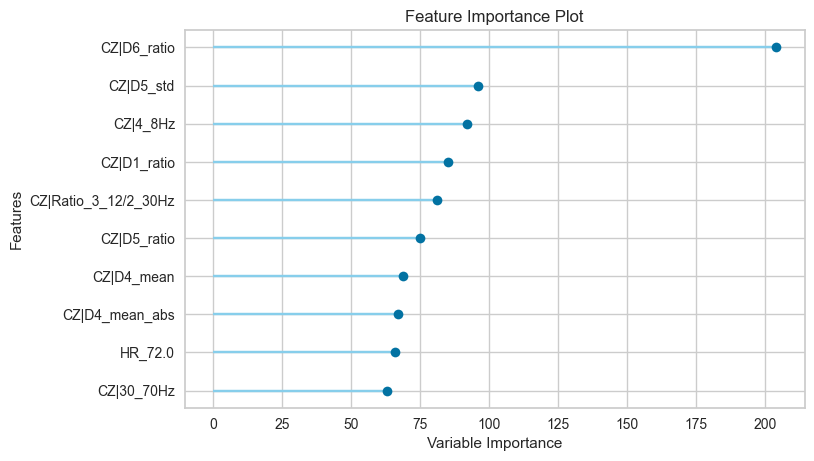

In [52]:
plot_model(lightgbm, plot='feature')

In [54]:
save_model(lightgbm, model_name = 'deployment_1')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['Gender',
                                                             'Impression',
                                                             'HR'],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_nu...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                              